# KMeans User Profiling 

In [ ]:
# Import File
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Import Dataset user

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/dataset/book/BX-Users.csv',sep=';')
df.head()

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


## Exploratory Data Analysis

In [ ]:
# Melakukan feature engineering untuk mengekstrak fitur baru pada dataset

user_id = df.User_ID
location = df.Location
country = df.Location
age = df.Age

# Menambahkan kolom country pada dataset sebagai feature baru
df = pd.DataFrame({'User_ID':user_id,'Location':location,'Country':country,'Age':age})
df['Location'] = df['Location'].str.rsplit(',').str[0] 
df['Country'] = df['Country'].str.rsplit(',').str[-1]
df.head()

,User_ID,Location,Country,Age
0,1,nyc,usa,NaN
1,2,stockton,usa,18.0
2,3,moscow,russia,NaN
3,4,porto,portugal,17.0
4,5,farnborough,united kingdom,NaN


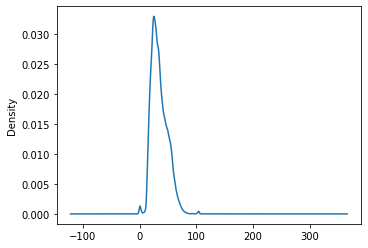

In [ ]:
#Distribusi Data sebelum prepocessing

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Age'].plot(kind='kde')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


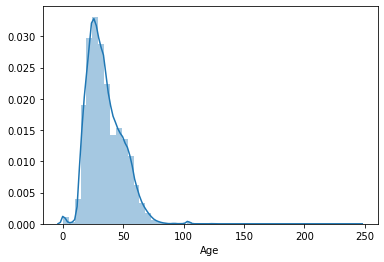

In [ ]:
import seaborn as sns

sns.distplot(df['Age']);

## Data Prepocessing

In [ ]:
# Total data, missing value, dan prosentase missing value pada Data

print("Jumlah data keseluruhan : ",(df.shape[0]))
print("Jumlah missing values : ", df['Age'].isnull().sum())
print("Prosentase missing value : ",round(((df['Age'].isnull().sum() / df.shape[0]) * 100)),'%')

Jumlah data keseluruhan :  278858
Jumlah missing values :  110762
Prosentase missing value :  40.0 %


In [ ]:
# Replace missing value with Mean of Data
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df.head()

,User_ID,Location,Country,Age
0,1,nyc,usa,34.751434
1,2,stockton,usa,18.000000
2,3,moscow,russia,34.751434
3,4,porto,portugal,17.000000
4,5,farnborough,united kingdom,34.751434


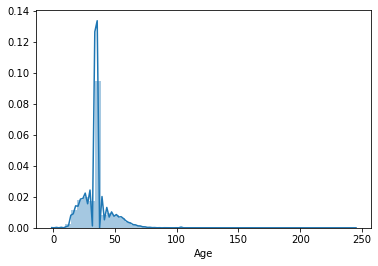

In [ ]:
# Distribusi data setelah diisi dengan rata-rata dari data
sns.distplot(df['Age']);

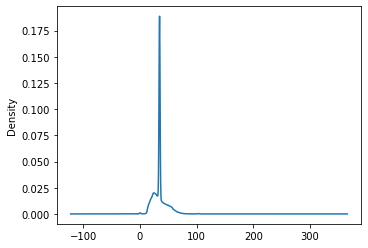

In [ ]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Age'].plot(kind='kde')

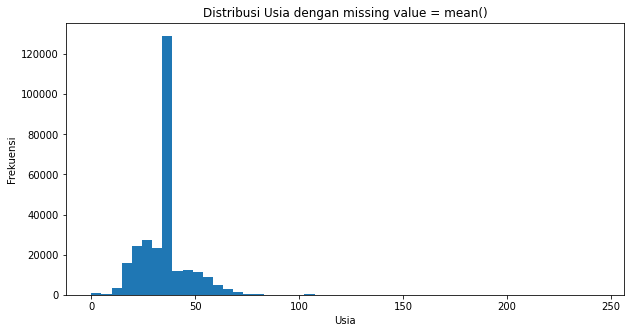

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(df['Age'], bins=50)
ax.set_xlabel('Usia')
ax.set_ylabel('Frekuensi')
ax.set_title('Distribusi Usia dengan missing value = mean()')
plt.show()

In [ ]:
# Mengitung kurtosis dari Age
# Rumus -> (P75 - P25)/(2(P90 - P10))

kurtosis = (df['Age'].quantile(0.75) - df['Age'].quantile(0.25)) / (2*(df['Age'].quantile(0.9) - df['Age'].quantile(0.1)))
print('Nilai kurtosis : ', kurtosis)

if(kurtosis == 0.263):
  print('Kemungkinan meso kurtosis')
elif(kurtosis > 0.263):
  print('Kemungkinan planty kurtosis')
elif(kurtosis < 0.263):
  print('Kemungkinan lepto kurtosis')
else:
  print('...')



Nilai kurtosis :  0.10344827586206896
Kemungkinan lepto kurtosis


In [ ]:
# Encoding Categorical Data with lebel encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Location'] = le.fit_transform(df['Location'])

In [ ]:
df.describe()

,User_ID,Location,Country,Age
count,278858.00000,278858.000000,278858.000000,278858.000000
mean,139429.50000,16451.260681,488.947798,34.751434
std,80499.51502,9352.773370,228.386395,11.202003
min,1.00000,0.000000,0.000000,0.000000
25%,69715.25000,8055.250000,249.000000,29.000000
50%,139429.50000,16828.000000,660.000000,34.751434
75%,209143.75000,24458.750000,660.000000,35.000000
max,278858.00000,32769.000000,708.000000,244.000000


In [ ]:
# Scaling data dengan minimum 0 dan maximum 1
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler().fit_transform(df.drop('User_ID', axis=1))

In [ ]:
df = pd.DataFrame(minmax, index=df.index,columns=['Age','Country','Location'])
df.head()

,Age,Country,Location
0,0.635082,0.932203,0.142424
1,0.851384,0.932203,0.073770
2,0.577924,0.723164,0.142424
3,0.703348,0.686441,0.069672
4,0.292227,0.909605,0.142424


In [ ]:
df.describe()

,Age,Country,Location
count,278858.000000,278858.000000,278858.000000
mean,0.502037,0.690604,0.142424
std,0.285415,0.322580,0.045910
min,0.000000,0.000000,0.000000
25%,0.245819,0.351695,0.118852
50%,0.513534,0.932203,0.142424
75%,0.746399,0.932203,0.143443
max,1.000000,1.000000,1.000000


## Clustering Process

In [ ]:
import numpy as np 
from sklearn.cluster import KMeans

dist_df = []

for num_cluster in range (1,20):
    km = KMeans(n_clusters = num_cluster)
    km.fit(df)
    dist_df.append([num_cluster, km.inertia_])
dist_df = pd.DataFrame(dist_df, columns= ['Number_of_Cluster', 'Distance'])

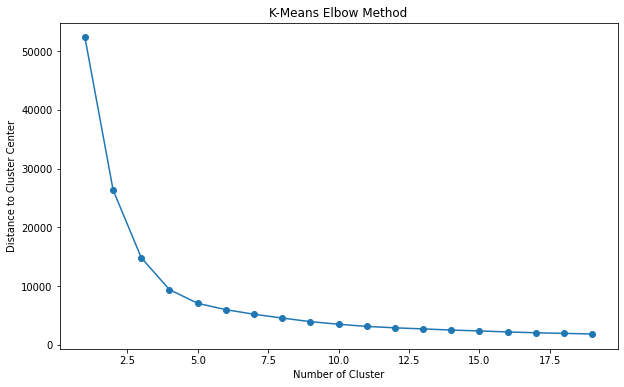

In [ ]:
fig, ax  = plt.subplots(figsize=(10,6))

ax.plot(dist_df.set_index("Number_of_Cluster"), marker='o')
ax.set_xlabel("Number of Cluster")
ax.set_ylabel("Distance to Cluster Center")
ax.set_title("K-Means Elbow Method")

plt.show()

Berdasarkan hasil dari Elbow Method, cluster terbaik berada di angka 4

In [ ]:
# Membuat model KMeans menggunaian n_cluster = 4

model_kmeans = KMeans(n_clusters = 4)
model_kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df['Cluster'] = model_kmeans.labels_
df.head()

,Age,Country,Location,Cluster
0,0.635082,0.932203,0.142424,0
1,0.851384,0.932203,0.073770,0
2,0.577924,0.723164,0.142424,0
3,0.703348,0.686441,0.069672,0
4,0.292227,0.909605,0.142424,3


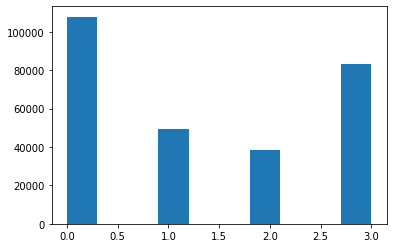

In [ ]:
# Jumlah dari tiap-tiap cluster

plt.hist(df['Cluster']) 
plt.show()

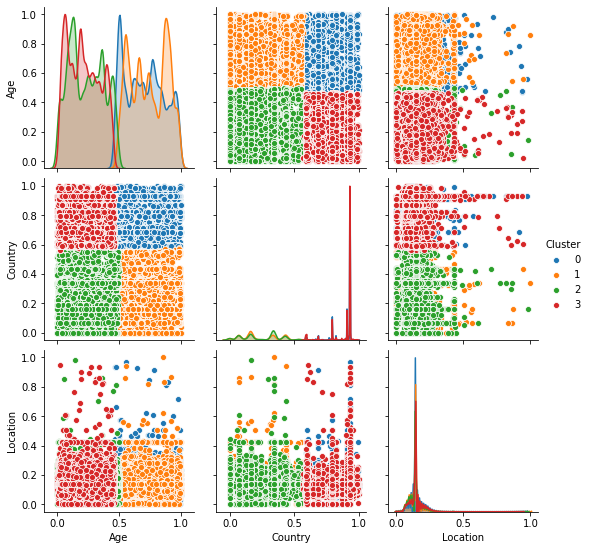

In [ ]:
sns.pairplot(df, hue='Cluster')

# Jaccard + KMeans

In [ ]:
#import dataset
book_df = pd.read_csv('/content/drive/My Drive/dataset/book/BX-Books.csv',sep=';',usecols=['ISBN','Book_Title'],dtype={'ISBN': 'str', 'Book_Title': 'str'})
rating_df = pd.read_csv('/content/drive/My Drive/dataset/book/BX-Book-Ratings.csv',sep=';',usecols=['User_ID','ISBN','Book_Rating'],dtype={'User_ID':'int64','ISBN': 'str', 'Book_Rating': 'float32'})
user_cluster = pd.read_csv ('/content/drive/My Drive/dataset/book/user_cluster.csv')

In [ ]:
# Ambil data item yang di rating sebanyak 500.000 data
rating_df = rating_df.iloc[0:500000]

In [ ]:
# Gabungkan data rating dan buku
df_merge = pd.merge(rating_df, book_df, on ='ISBN')
df_merge.head()

,User_ID,ISBN,Book_Rating,Book_Title
0,276725,034545104X,0.0,Flesh Tones: A Novel
1,2313,034545104X,5.0,Flesh Tones: A Novel
2,6543,034545104X,0.0,Flesh Tones: A Novel
3,8680,034545104X,5.0,Flesh Tones: A Novel
4,10314,034545104X,9.0,Flesh Tones: A Novel


In [ ]:
combine_book_rating = df_merge.dropna(axis = 0, subset = ['User_ID'])

book_rating_count = (combine_book_rating.
                    groupby(by = ['User_ID'])['Book_Rating'].
                    count().
                    reset_index().
                    rename(columns = {'Book_Rating': 'total_rating_count'})
                    [['User_ID', 'total_rating_count']])
rating_with_total_rating_count = combine_book_rating.merge(book_rating_count, left_on = 'User_ID', right_on = 'User_ID', how = 'left')
rating_with_total_rating_count.head()

,User_ID,ISBN,Book_Rating,Book_Title,total_rating_count
0,276725,034545104X,0.0,Flesh Tones: A Novel,1
1,2313,034545104X,5.0,Flesh Tones: A Novel,36
2,6543,034545104X,0.0,Flesh Tones: A Novel,425
3,8680,034545104X,5.0,Flesh Tones: A Novel,25
4,10314,034545104X,9.0,Flesh Tones: A Novel,167


In [ ]:
# Ambil user yang sudah merating lebih dari 100 buku

popularity_threshold = 100
rating_popular_book = rating_with_total_rating_count.query('total_rating_count >= @popularity_threshold')
rating_popular_book.head()

,User_ID,ISBN,Book_Rating,Book_Title,total_rating_count
2,6543,034545104X,0.0,Flesh Tones: A Novel,425
4,10314,034545104X,9.0,Flesh Tones: A Novel,167
5,23768,034545104X,0.0,Flesh Tones: A Novel,1690
7,28523,034545104X,0.0,Flesh Tones: A Novel,374
14,77480,034545104X,8.0,Flesh Tones: A Novel,168


In [ ]:
user_cluster = user_cluster.drop(['Country','Location','Age'], axis = 1)

In [ ]:
# Gabungkan data rating dan cluster
rating_popular_book = rating_popular_book.merge(user_cluster, on='User_ID', how='inner')

In [ ]:
rating_popular_book.head()

,User_ID,ISBN,Book_Rating,Book_Title,total_rating_count,Cluster
0,6543,034545104X,0.0,Flesh Tones: A Novel,425,1
1,6543,316666343,0.0,The Lovely Bones: A Novel,425,1
2,6543,385504209,0.0,The Da Vinci Code,425,1
3,6543,971880107,0.0,Wild Animus,425,1
4,6543,312966970,0.0,Four To Score (A Stephanie Plum Novel),425,1


In [ ]:
# Membuat user based rating matrix

book_features_df= rating_popular_book.pivot_table(index='User_ID',columns='ISBN',values='Book_Rating').fillna(0)

In [ ]:
book_features_df.head()

ISBN,000104687X,000104799X,000223257X,000224554X,000225056X,000225414X,000225851X,000225929X,000225946X,000255433X,000274094X,000458824X,000470973X,000611962X,000614330X,000616899X,000617616X,000617843X,000617891X,000648025X,000648302X,000648302x,000648381X,000649319X,000649840X,000651202X,000651202x,000654861X,000671675X,000673765X,000675239X,000710331X,000710698X,000711737X,000712032X,000712855X,000716131X,000716226X,002008823X,002011690X,...,B000078UH8,B00007CWQC,B00007FYKO,B00007FYKW,B00007MAM9,B00008JYQC,B00008NRHQ,B00008RWPV,B00009ANY9,B00009APKU,B00009EF82,B00009NDAN,B0000A2U93,B0000C2W5U,B0000C2W66,B0000C37EK,B0000C7BNG,B0000C7GF8,B0000DAPP1,B0000DYXID,B0000T6KHI,B0000VZEFK,B0000VZEH8,B0000VZEJQ,B0000X8HIE,B00011SOXI,B00013AFZQ,B00013AWVI,B00013AWZY,B00013AX6W,B00016560C,B00016560M,B00017IWGQ,B0001GDNCK,B0001GMSV2,B0001I1JII,B0001PBXMS,B000234N3A,B000234NC6,B00029DGGO
User_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test  = train_test_split (book_features_df, test_size=0.2)

In [ ]:
X_test.head()

ISBN,User_ID,000104687X,000104799X,000223257X,000224554X,000225056X,000225414X,000225851X,000225929X,000225946X,000255433X,000274094X,000458824X,000470973X,000611962X,000614330X,000616899X,000617616X,000617843X,000617891X,000648025X,000648302X,000648302x,000648381X,000649319X,000649840X,000651202X,000651202x,000654861X,000671675X,000673765X,000675239X,000710331X,000710698X,000711737X,000712032X,000712855X,000716131X,000716226X,002008823X,...,B000078UH8,B00007CWQC,B00007FYKO,B00007FYKW,B00007MAM9,B00008JYQC,B00008NRHQ,B00008RWPV,B00009ANY9,B00009APKU,B00009EF82,B00009NDAN,B0000A2U93,B0000C2W5U,B0000C2W66,B0000C37EK,B0000C7BNG,B0000C7GF8,B0000DAPP1,B0000DYXID,B0000T6KHI,B0000VZEFK,B0000VZEH8,B0000VZEJQ,B0000X8HIE,B00011SOXI,B00013AFZQ,B00013AWVI,B00013AWZY,B00013AX6W,B00016560C,B00016560M,B00017IWGQ,B0001GDNCK,B0001GMSV2,B0001I1JII,B0001PBXMS,B000234N3A,B000234NC6,B00029DGGO
685,118533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,53392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451,79441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,10314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500,87746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
book_features_df = book_features_df.reset_index()

In [ ]:
# Train model with Knn and Jaccard sim

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'jaccard', algorithm= 'brute')
model_knn.fit(X_train) 

NearestNeighbors(algorithm='brute', leaf_size=30, metric='jaccard',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
# Generate Index yang akan direkomendasikan

query_index = np.random.choice(X_train.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(X_train.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 10)

291


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:1738: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [ ]:
#nearest = []
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(X_train.iloc[query_index].User_ID))
    else:
        #nearest.append(X_test.iloc[indices.flatten()[i]].User_ID)
        print('{0}: {1}, with distance of {2}:'.format(i, X_train.iloc[indices.flatten()[i]].User_ID, distances.flatten()[i]))

Recommendations for 111578.0:

1: 100644.0, with distance of 0.9722222222222222:
2: 86202.0, with distance of 0.9727272727272728:
3: 52002.0, with distance of 0.972972972972973:
4: 95193.0, with distance of 0.9733333333333334:
5: 19842.0, with distance of 0.975:
6: 113817.0, with distance of 0.9759036144578314:
7: 75819.0, with distance of 0.9766081871345029:
8: 69042.0, with distance of 0.9775280898876404:
9: 77181.0, with distance of 0.9775280898876404:


In [ ]:
y_pred = model_knn.(X_test)

AttributeError: ignored

Dapat dilihat bahwa untuk user_id 31040 terdapat 10 user yang memiliki jarak terdekat, kemudia akan diambil user terdekat yang memiliki cluster yang sama dengan user_id 37712

In [ ]:
rating_popular_book[(rating_popular_book['User_ID'] == 31040)].head(1)

,User_ID,ISBN,Book_Rating,Book_Title,total_rating_count,Cluster
243383,31040,61097101,0.0,The Saving Graces: A Novel,121,1


Data dengan user_id 37712 masuk kedalam cluster 2, maka dari itu untuk mendapatkan rekomendasinya diambil dari user terdekat yang memiliki cluster yang sama.

In [ ]:
# User_ID 86189
rating_popular_book[(rating_popular_book['User_ID'] == 32122)].head(1)

,User_ID,ISBN,Book_Rating,Book_Title,total_rating_count,Cluster
152056,32122,043935806X,10.0,Harry Potter and the Order of the Phoenix (Boo...,159,1


In [ ]:
# User_ID 21014
rating_popular_book[(rating_popular_book['User_ID'] == 21014)].head(1)

,User_ID,ISBN,Book_Rating,Book_Title,total_rating_count,Cluster
35927,21014,038550120X,0.0,A Painted House,772,2


Dapat dilihat bahwa user pertama yang terdekat, memiliki cluster yang sama dengan user 31040, maka user kedua adalah user yang direkomendasikan.

## Melihat Buku yang direkoemdasikan kepada user 31040


In [ ]:
# User yang akan dicari rekomenadsinya
id_target = rating_popular_book.User_ID == 31040

# User yang direkoemdasikan
id_predict = rating_popular_book.User_ID == 32122

# Mengeliminasi rating yang memiliki nilai 0
zero_rating = rating_popular_book.Book_Rating != 0.0

In [ ]:
# Hitung masing-masing jumlah rating dari target dan predict
rating_popular_book[(id_target)].head(1)

,User_ID,ISBN,Book_Rating,Book_Title,total_rating_count,Cluster
243383,31040,61097101,0.0,The Saving Graces: A Novel,121,1


In [ ]:
rating_popular_book[(id_predict) & zero_rating].head(1)

,User_ID,ISBN,Book_Rating,Book_Title,total_rating_count,Cluster
152056,32122,043935806X,10.0,Harry Potter and the Order of the Phoenix (Boo...,159,1


In [ ]:
target = rating_popular_book[(id_target)]
predict = rating_popular_book[(id_predict) & zero_rating]

Dari hasil diatas, dapat ditunjukan bahwa total rating dari user yang direkomendasikan lebih banyak melakukan penilaian, maka ambil item yang tidak ber irisan dengan target

In [ ]:
pd.merge(target, predict, how='left', on='ISBN')

,User_ID_x,ISBN,Book_Rating_x,Book_Title_x,total_rating_count_x,Cluster_x,User_ID_y,Book_Rating_y,Book_Title_y,total_rating_count_y,Cluster_y
0,31040,61097101,0.0,The Saving Graces: A Novel,121,1,NaN,NaN,NaN,NaN,NaN
1,31040,671003755,0.0,She's Come Undone (Oprah's Book Club (Paperback)),121,1,NaN,NaN,NaN,NaN,NaN
2,31040,044023722X,0.0,A Painted House,121,1,NaN,NaN,NaN,NaN,NaN
3,31040,425154092,0.0,From Potter's Field,121,1,NaN,NaN,NaN,NaN,NaN
4,31040,345404769,8.0,Silent Witness,121,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
116,31040,899191401,6.0,"Make noise, make merry: The story and meaning ...",121,1,NaN,NaN,NaN,NaN,NaN
117,31040,937539589,0.0,The Art of Dealing with People,121,1,NaN,NaN,NaN,NaN,NaN
118,31040,943173531,0.0,The Blind Palmist: Being an Often Humorous Acc...,121,1,NaN,NaN,NaN,NaN,NaN
119,31040,1572971940,0.0,"Jessica Fletcher Presents...: Murder, They Wro...",121,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
t_pred = book_features_df.User_ID == 31040

In [ ]:
y_true = book_features_df.User_ID == 32122

In [ ]:
mse =  mean_squared_error(y_true, t_pred)
mse

TypeError: ignored